# Setup

You need this to read files from Google Drive


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import os
import shutil
pd.options.display.max_rows = 60
pd.options.display.min_rows = None

In [9]:
random.seed(1)
np.random.seed(1)

# Data Preparation

## Training / Test Data
Original Data is from https://github.com/marcoortu/jira-social-repository . This is from the paper "The Jira Repository Dataset" by Marco Ortu et al - see https://www.researchgate.net/publication/301370380_The_JIRA_Repository_Dataset . This was then processed to remove "junk" like email addresses, URLs as described in the notebook ExploratoryDataAnalysis.ipynb and DNNModelAnalysis.ipynb (see section "Increase size of data set")

Steps to prepare the data for BlazingText can be found here: https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html

In [ ]:
dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Octopus2/JIRA_OPEN_DATA_LARGESET_PROCESSED.csv")

In [ ]:
dataset.head()

Unnamed: 0  ...                                           features
0           0  ...  MAX_VERSIONS not respected. Below is a report ...
1           1  ...  Splitting log in a hostile environment -- bad ...
2           2  ...  DependentColumnFilter.toString() throws NullPo...
3           3  ...  Thrift host and port are hardcoded in thrift  ...
4           4  ...  MapReduce based tests broken on Hadoop  . . -a...

[5 rows x 5 columns]

In [ ]:
dataset.dtypes

Unnamed: 0      int64
title          object
description    object
priority       object
features       object
dtype: object

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'title', 'description', 'priority', 'features'], dtype='object')

(array([ 2949.,     0., 21272.,     0., 12550.,     0.,   936.,     0.,
         3657.,   149.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

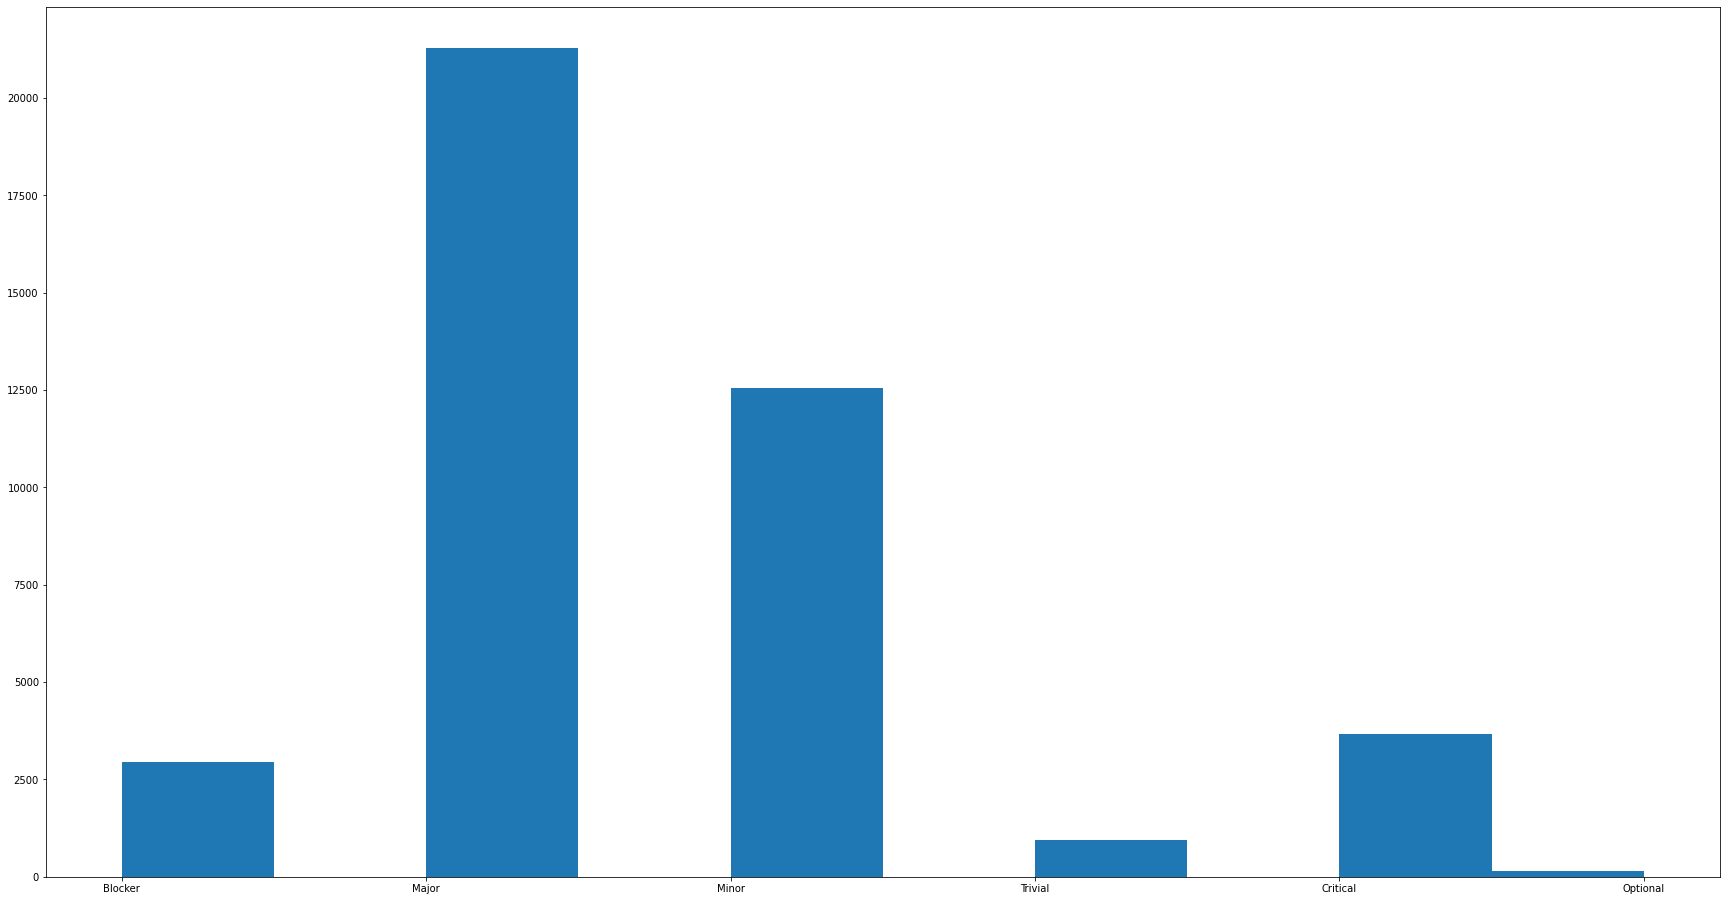

In [ ]:
plt.figure(figsize=(30,16))
plt.hist(dataset.priority)

The data is highly biased to Major. However we only have ~ 400+ data points so we are still going to use it as is. 

Ok there are 6 categories. We will use the following labels:


1.   Optional
2.   Trivial
3.   Minor
4.   Major
5.   Critical
6.   Blocker



In [ ]:
# standard train/test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset.features, dataset.priority, test_size=0.3)

It took me a while to figure out what data format was used by AutoML for NLP as the documentation wasn't very clear. It wasn't until I tried to upload a training data set that I figured it out. On the tool tip to upload the training data set you will find the instructions (see below). It was then I was able to figure out how to format the training data.

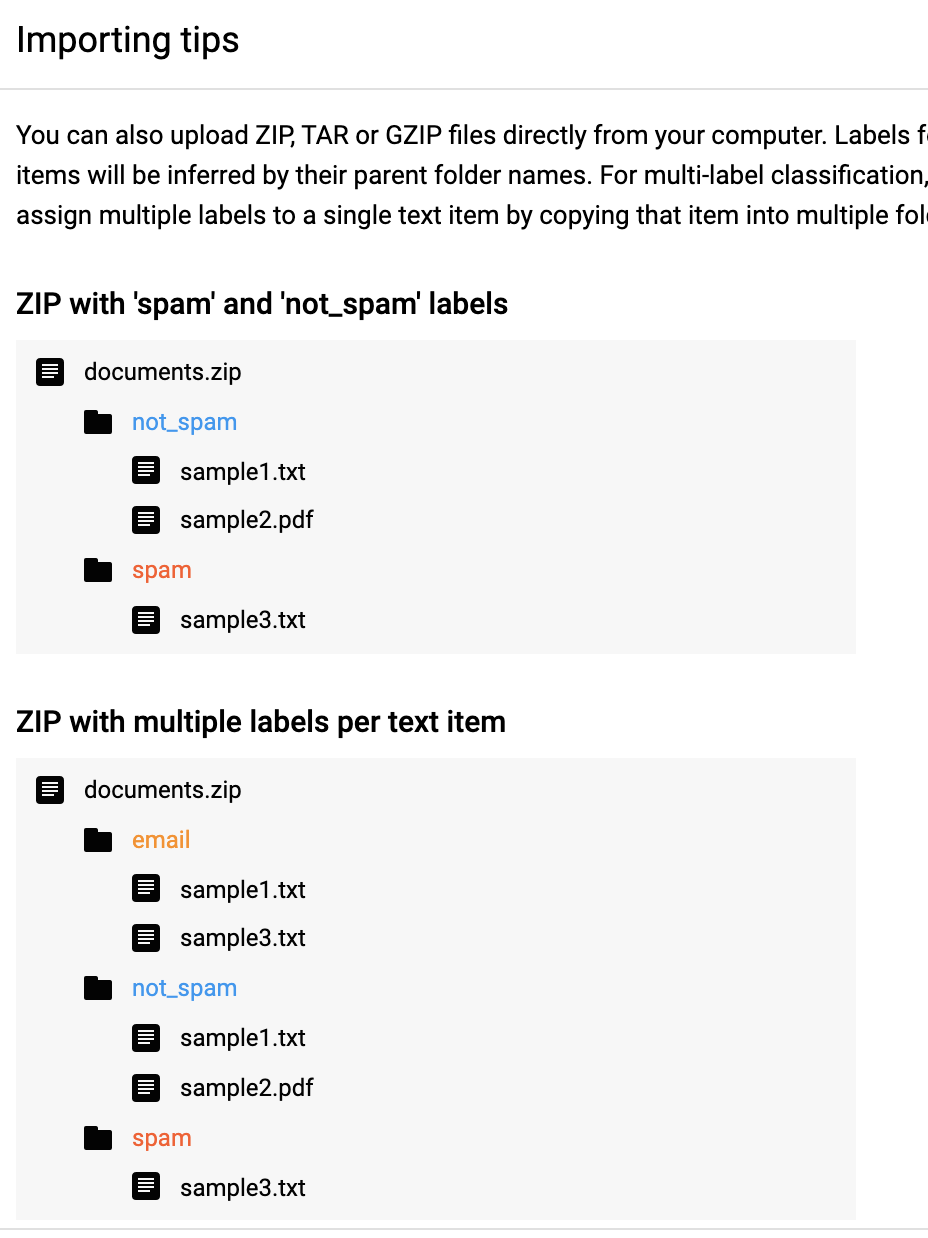

In [ ]:
# write training data function
def write_training_data_to_zipfile(path, Xdata, Ydata):
   os.chdir(path)
   count = {}
   num_rows = Xdata.shape[0]
   for i in range(1,num_rows):
      label = Ydata.iloc[i]
      feature = Xdata.iloc[i]
      folder = path + "/" + label
      #print("Folder:" + folder)
      if not os.path.exists(folder):
         print("Creating folder " + folder)
         os.mkdir(folder)
      if not (label in count.keys()):
         count[label] = 1
      else:
         count[label] += 1
      file = folder + "/" + "sample" + str(count[label]) + ".txt"
      print("Writing file " + file) 
      with open(file, 'wb') as fp:
         fp.write(feature.encode("utf-8"))
         fp.write("\n".encode('utf-8'))
         fp.close()

            

In [ ]:
# write file function
def write_data_to_csv(path, Xdata, Ydata):
    with open(path, 'wb') as fp:
       num_rows = Xdata.shape[0]
       for i in range(1,num_rows):
            output = labels[Ydata.iloc[i]] + "," + Xdata.iloc[i]
            fp.write(output.encode("utf-8"))
            fp.write("\n".encode('utf-8'))

In [ ]:
# write train data files
write_training_data_to_zipfile("/content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data",Xtrain,Ytrain)

Streaming output truncated to the last 5000 lines.
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12320.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12321.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12322.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12323.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12324.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Minor/sample7237.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Minor/sample7238.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Major/sample12325.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Minor/sample7239.txt
Writing file /content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data/Mino

In [ ]:
# zip up the files
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/Data")
! zip -r documents.zip *

Streaming output truncated to the last 5000 lines.
  adding: Minor/sample4521.txt (deflated 37%)
  adding: Minor/sample4522.txt (deflated 18%)
  adding: Minor/sample4523.txt (deflated 45%)
  adding: Minor/sample4524.txt (deflated 33%)
  adding: Minor/sample4525.txt (deflated 48%)
  adding: Minor/sample4526.txt (deflated 9%)
  adding: Minor/sample4527.txt (deflated 37%)
  adding: Minor/sample4528.txt (deflated 76%)
  adding: Minor/sample4529.txt (deflated 48%)
  adding: Minor/sample4530.txt (deflated 31%)
  adding: Minor/sample4531.txt (deflated 36%)
  adding: Minor/sample4532.txt (stored 0%)
  adding: Minor/sample4533.txt (deflated 31%)
  adding: Minor/sample4534.txt (stored 0%)
  adding: Minor/sample4535.txt (deflated 40%)
  adding: Minor/sample4536.txt (deflated 35%)
  adding: Minor/sample4537.txt (deflated 40%)
  adding: Minor/sample4538.txt (deflated 31%)
  adding: Minor/sample4539.txt (deflated 34%)
  adding: Minor/sample4540.txt (deflated 32%)
  adding: Minor/sample4541.txt (stor

In [ ]:
!ls

Blocker   documents.zip      Major  Optional
Critical  documents.zip.zip  Minor  Trivial


I decided that I wanted to save the documents.zip in a GS bucket

How to move files from Google Drive over to GS bucket - see https://medium.com/@philipplies/transferring-data-from-google-drive-to-google-cloud-storage-using-google-colab-96e088a8c041

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = 'octopus-282815'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey

gs://octopus2/


In [ ]:
bucket_name = 'octopus2'
!gsutil -m cp -r documents.zip gs://{bucket_name}/data/

Copying file://documents.zip [Content-Type=application/zip]...
/ [1/1 files][ 20.9 MiB/ 20.9 MiB] 100% Done                                    
Operation completed over 1 objects/20.9 MiB.                                     


In [ ]:
# There is no need to write the test data set as we can use Xtest and Ytest directly

# Training the Model

## Readers familiar with GCP 

The steps on how to use GCP AutoML for text classification can be found here: https://cloud.google.com/natural-language/automl/docs

## Newbies to GCP

### Set up

#### Create a project

Follow the instructions here for creating a project - https://cloud.google.com/appengine/docs/standard/nodejs/building-app/creating-project

#### Enable APIs

See the section "Enabling services" in this https://cloud.google.com/service-usage/docs/enable-disable

The APIs you want to enable are:


*   Cloud Natural Language API
*   Cloud Storage API



#### Create GS Bucket
Navigate to "Storage" and click on "Storage" 


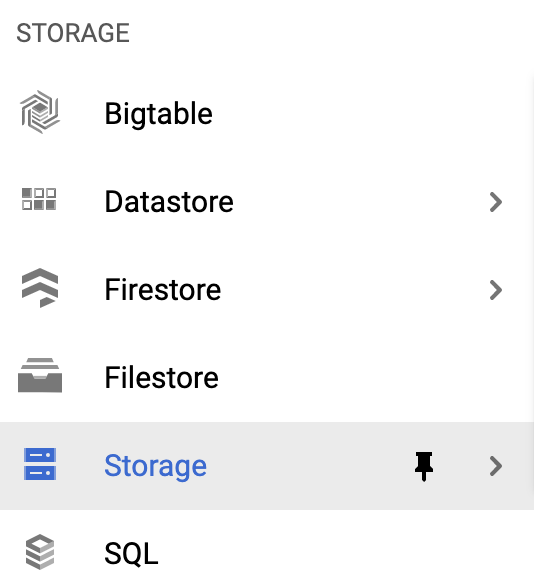

Follow the instructions to create a GS bucket here https://cloud.google.com/storage/docs/creating-buckets

#### Import Data

Navigate to "Artificial Intelligence" and click on "Natural Language"

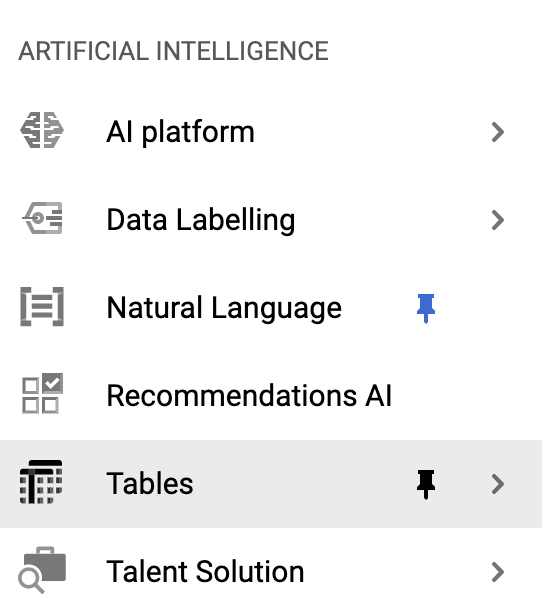

Next select upload zip file option, select the "documents.zip" file on your file system, fill in the GS bucket location and click "Import". This takes some time to run but GCP will send you an email once it is completed.

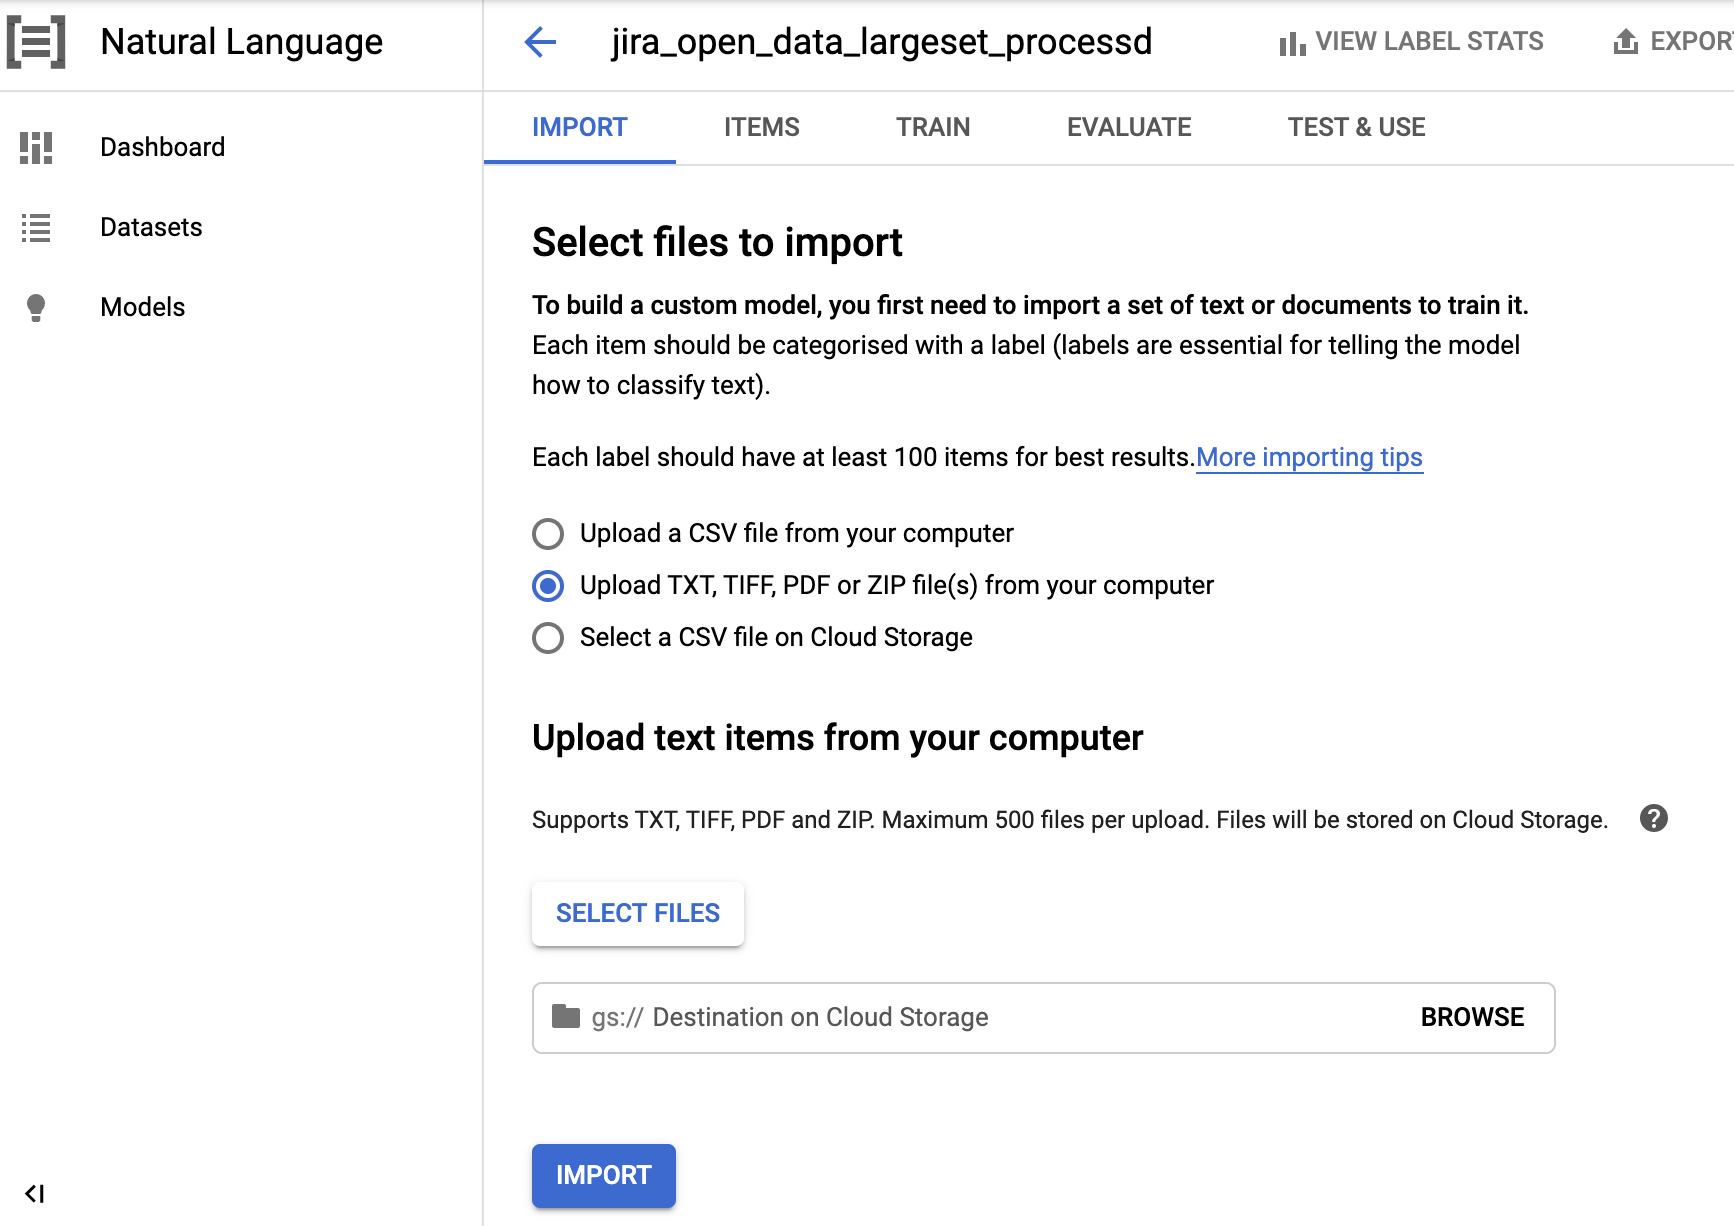

### Review the imported data

Click on the "Items" tab. There you can review what has been uploaded and processed. 



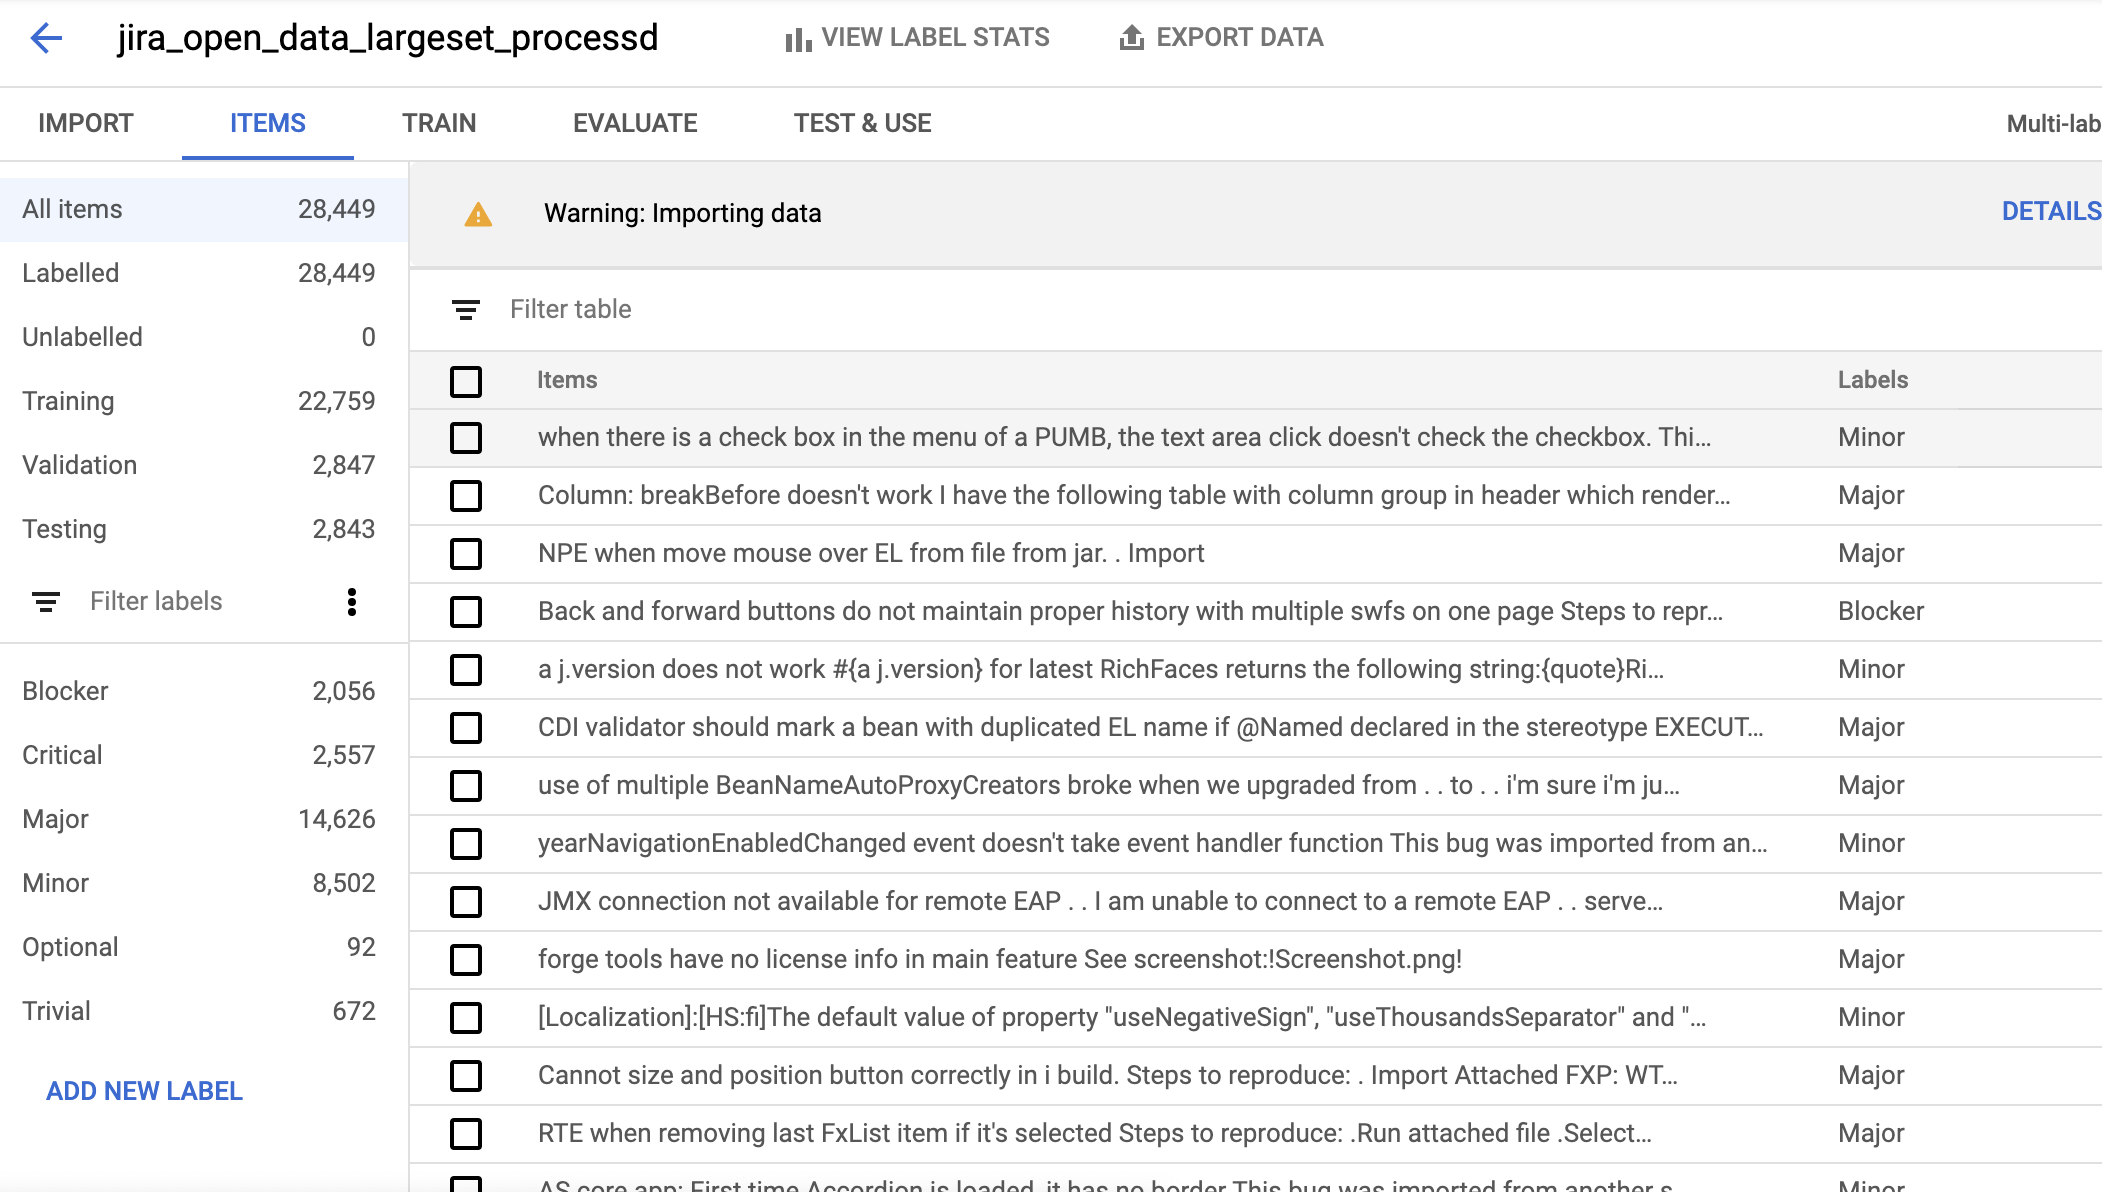



### Kick Off Training

Just click on the "Train" tab and click "Start Training". This will take a few hours to run as it is searching for the best algorithm and hyperparameters. You will get a email when the task is completed. 

# Evaluate Model Training


Once the training job is completed, you will see something like this: 


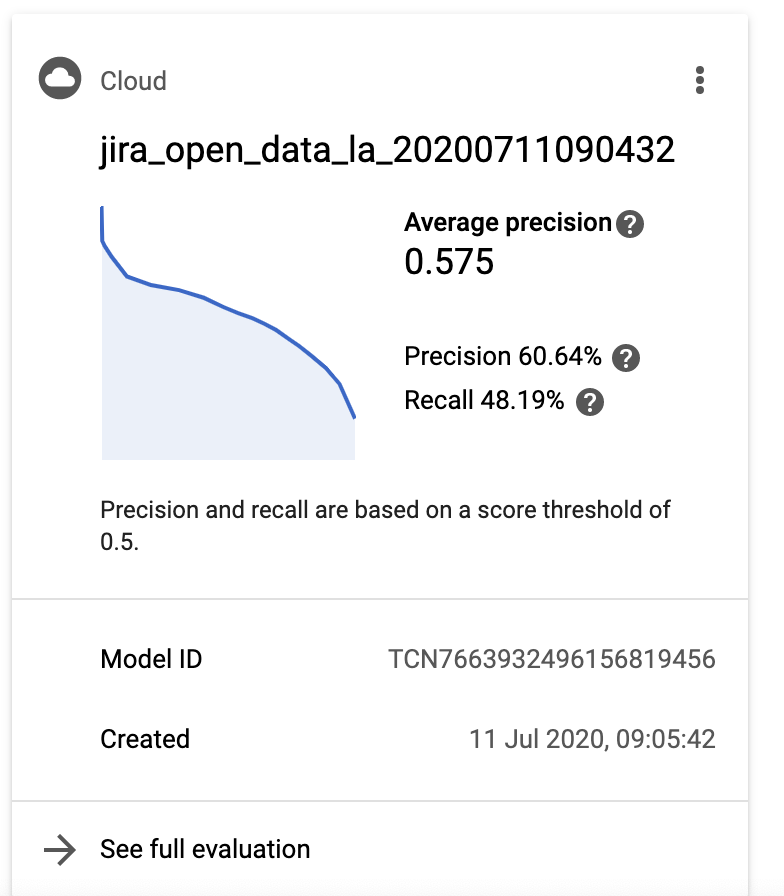

Click on the "See full evaluation" or click on the "Evaluate" tab

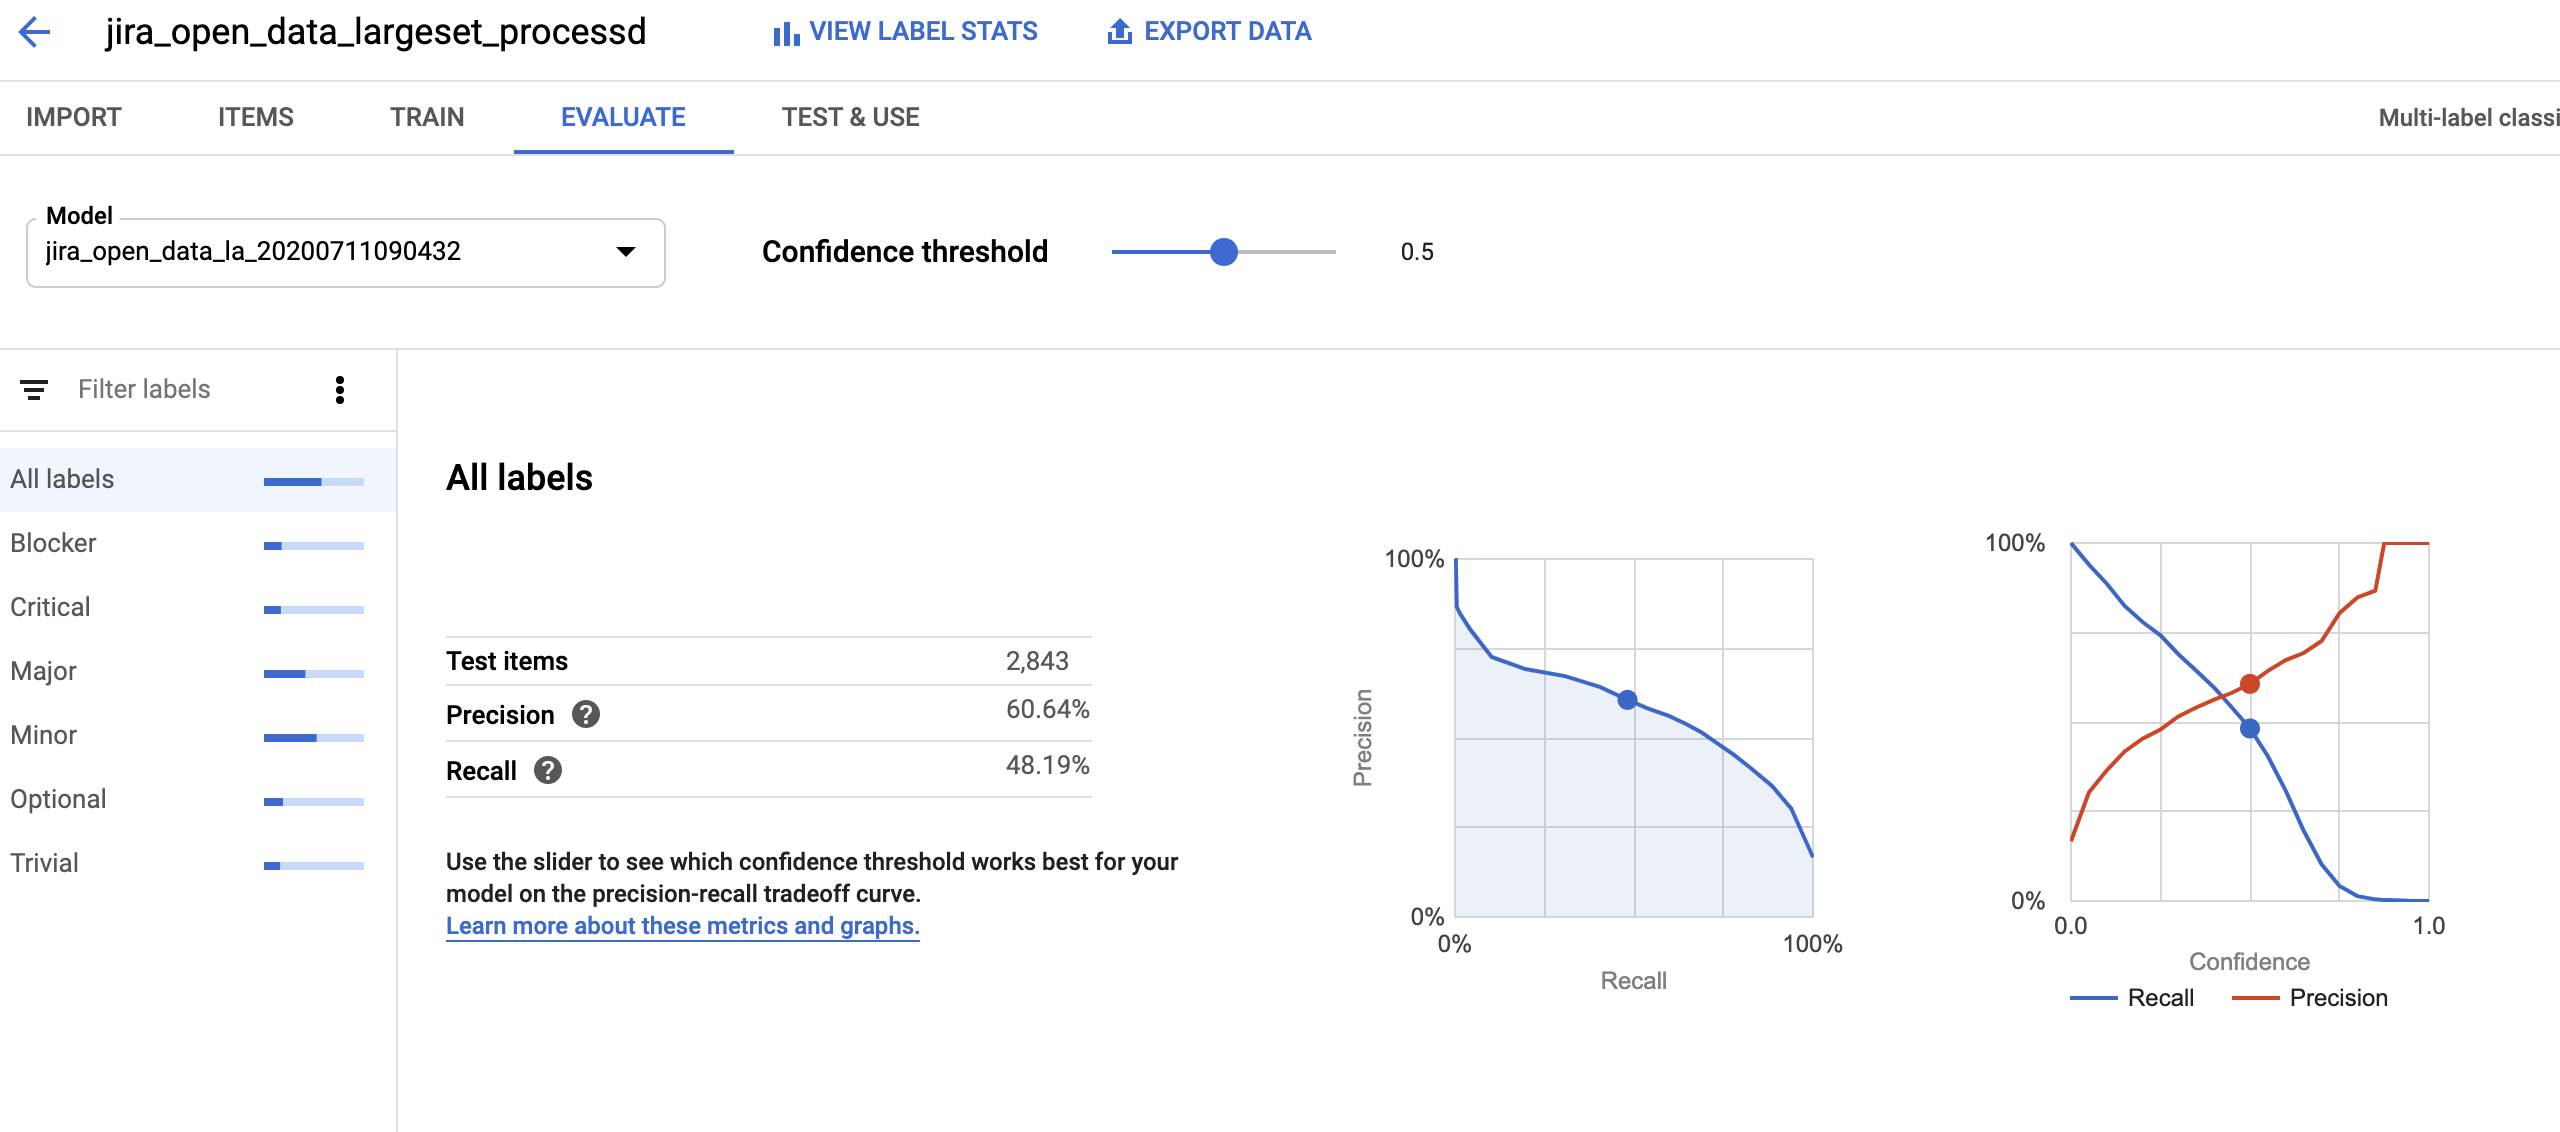

You can select each label on the left to see the precision and recall metrics 

One thing I really like about this is they actually list out the true positives, false negatives and false positives for you to do some kind of analysis

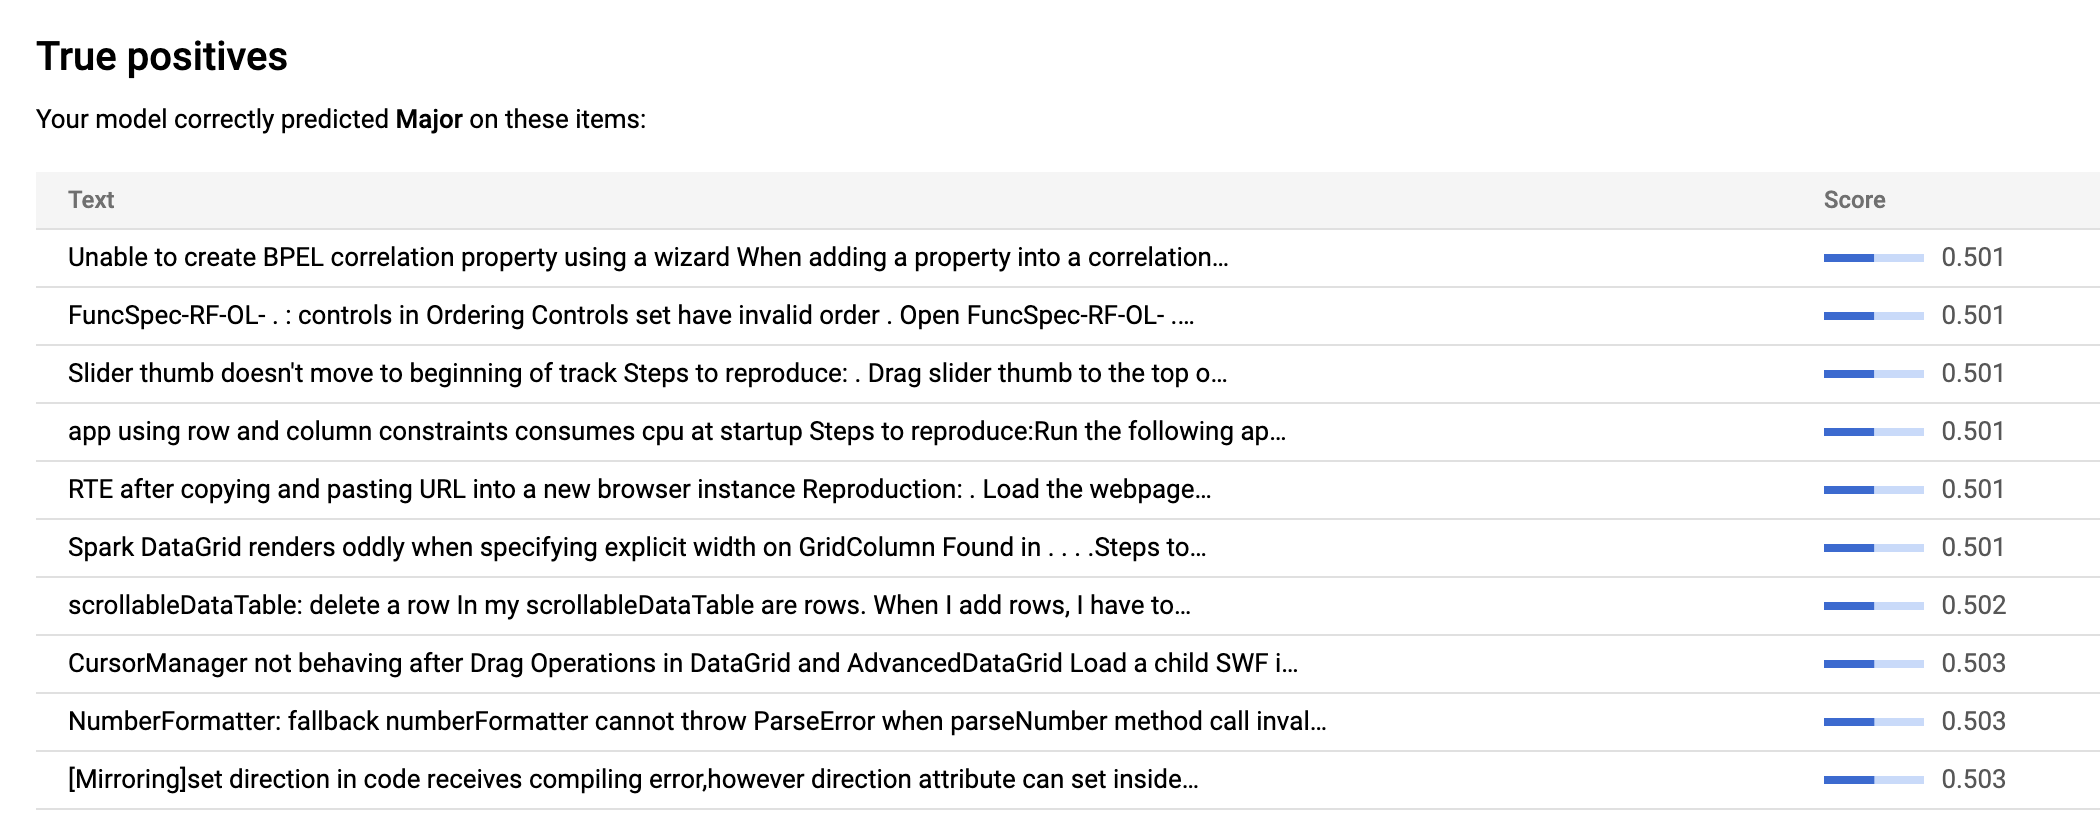

# Testing the deployed model

Next, we'd like to take the prediction algorithm for a test drive. First click on "Test & Use"

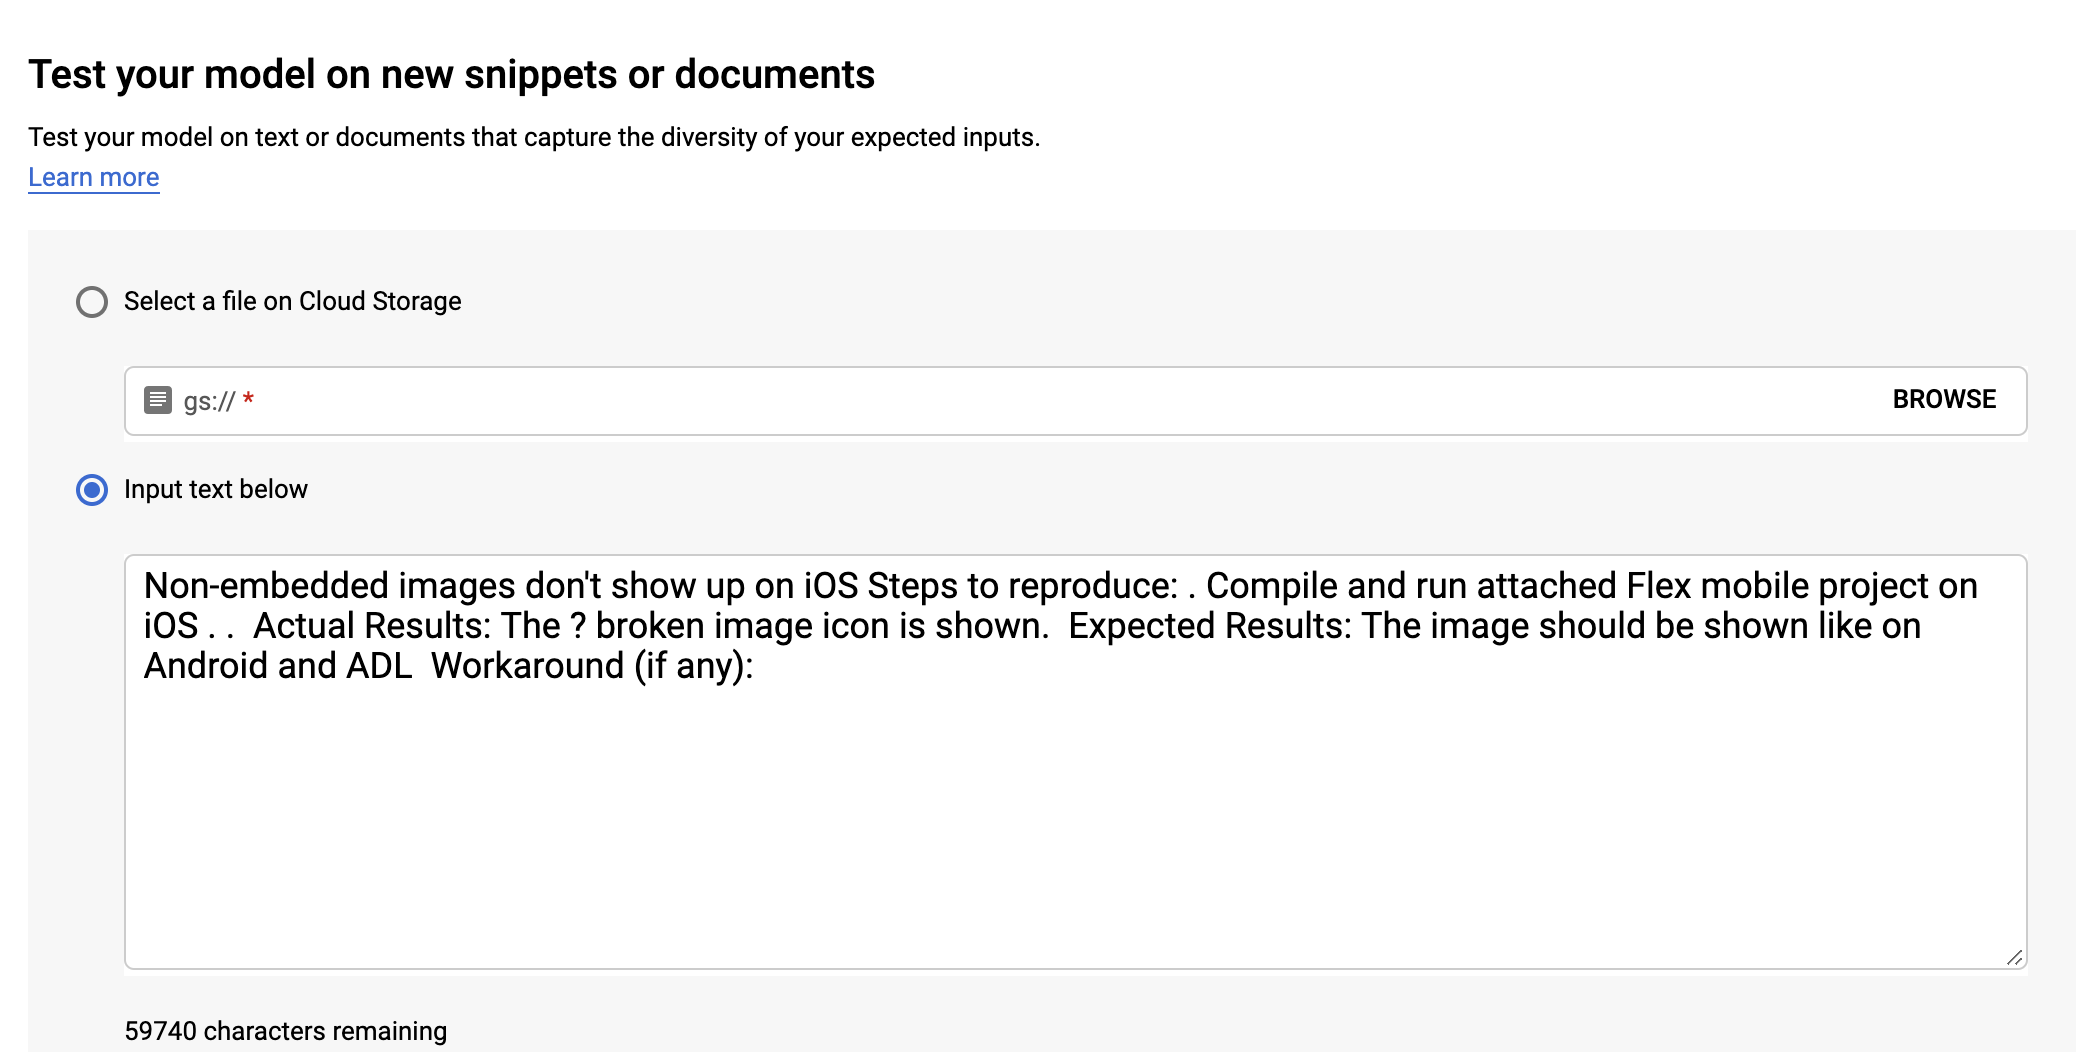



What I did was just to copy and paste a text from the test data set and clicked on the "Predict" button. 

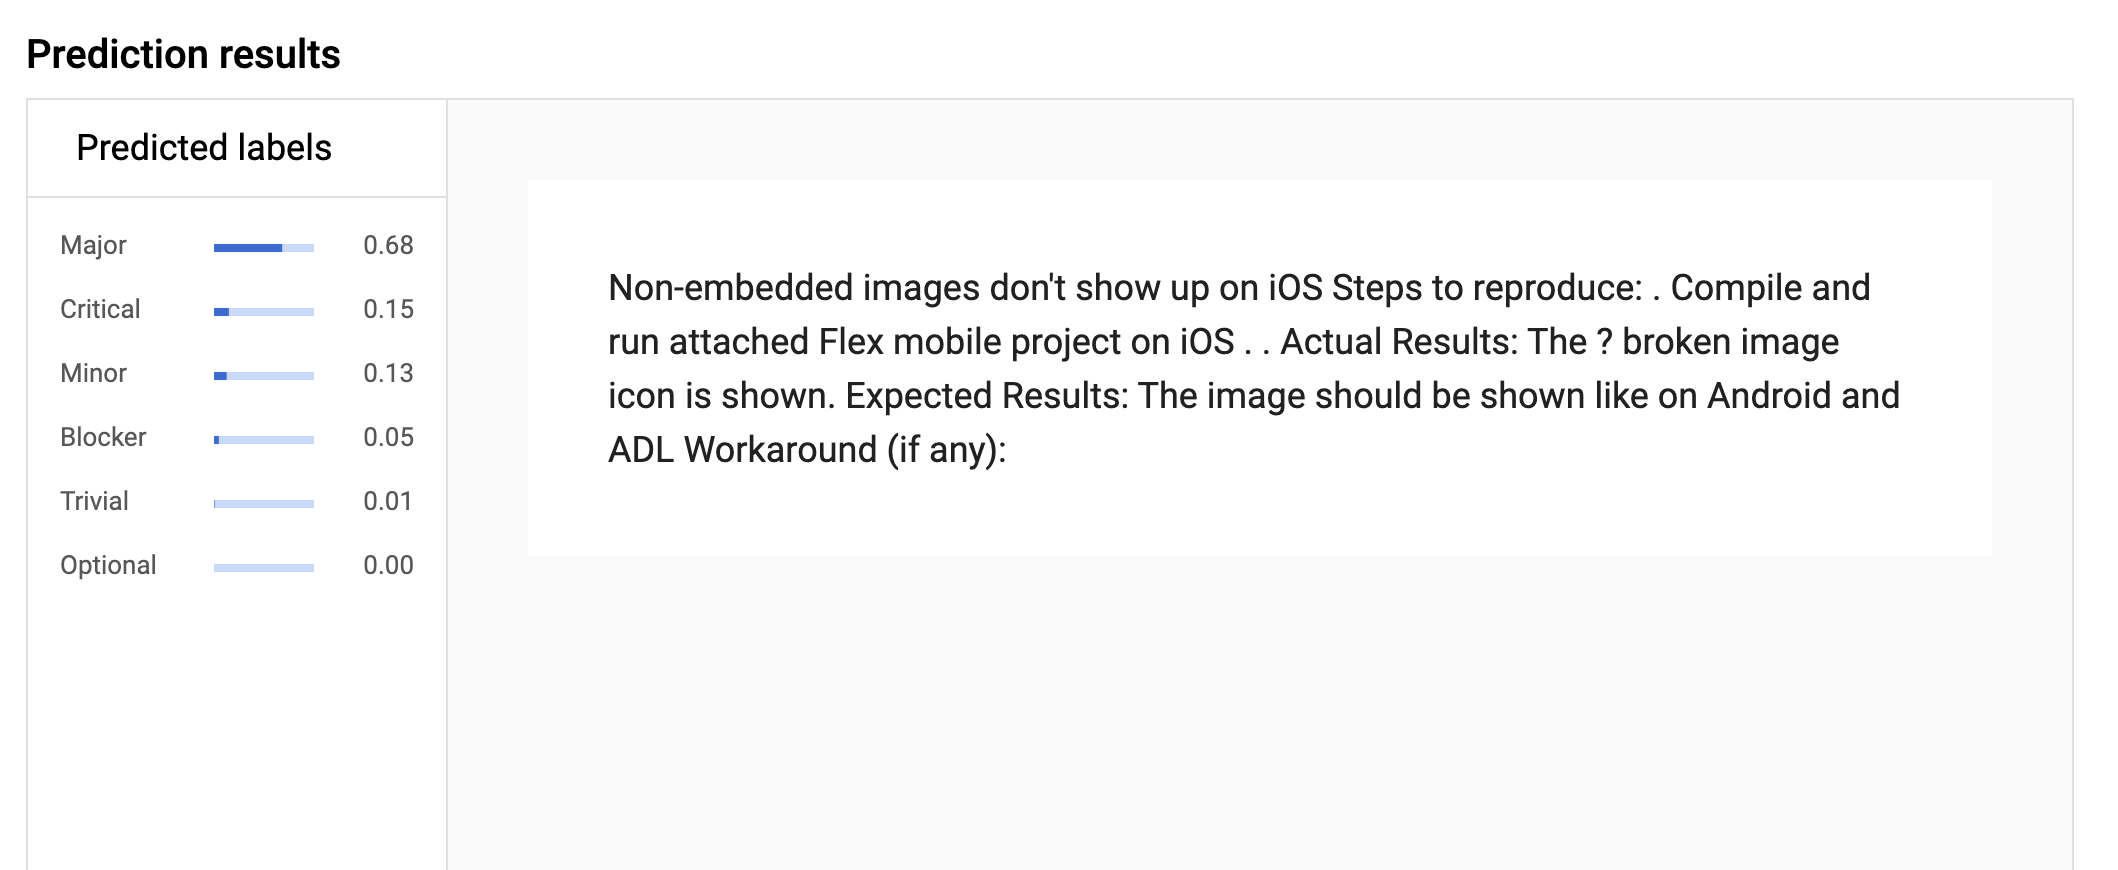

Next if you scroll down there are sample Python code for you to make calls to you model.

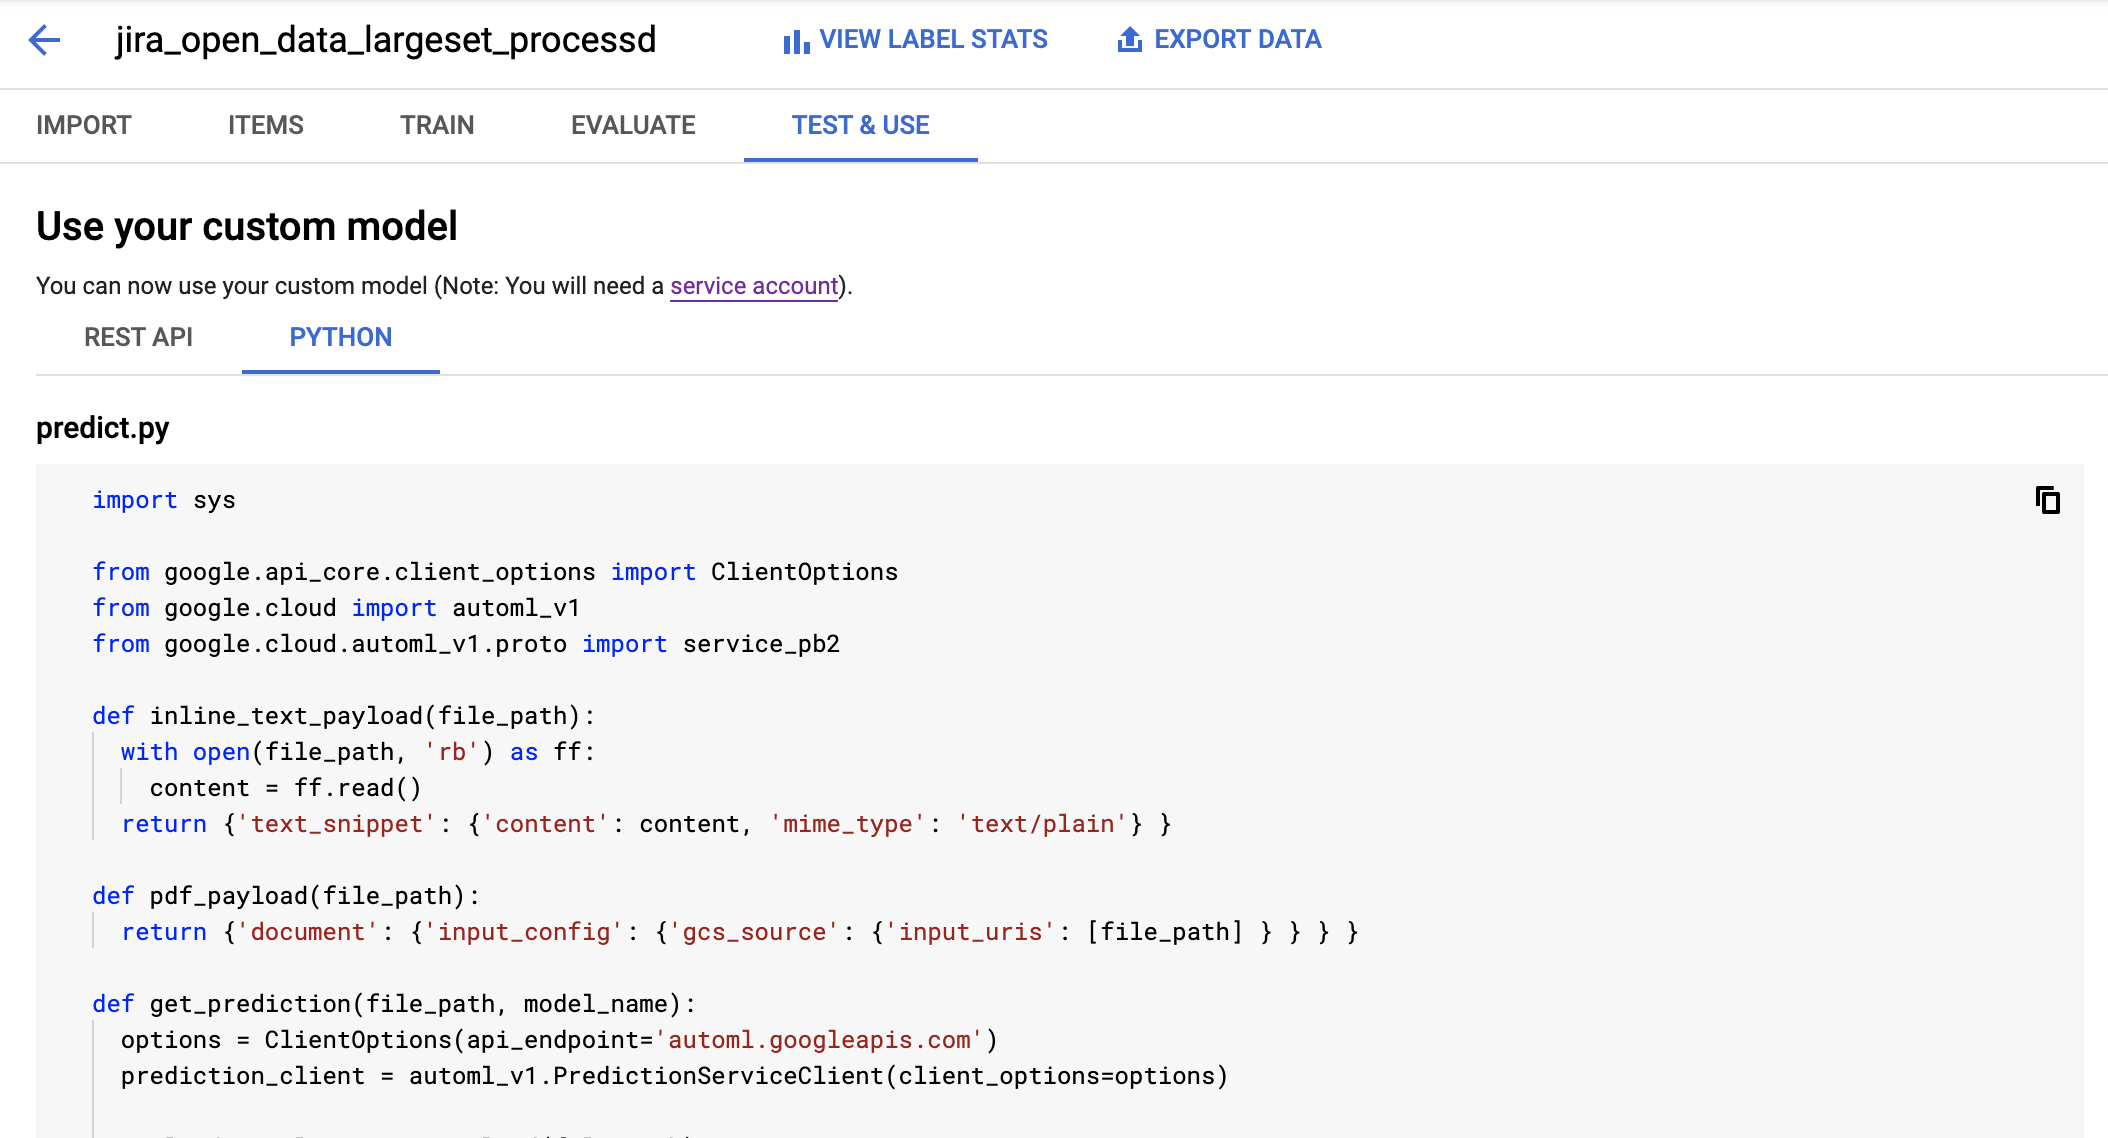

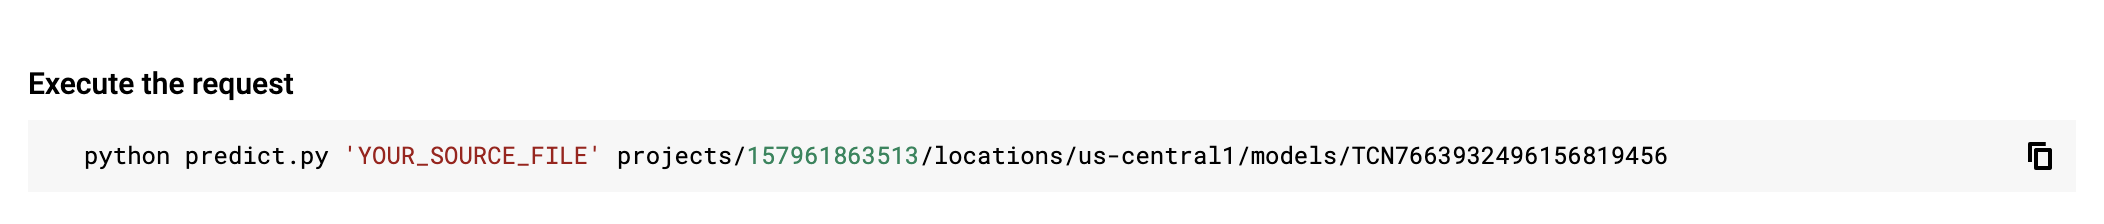

One thing I like about GCP is that you can actually open a console for exactly that. Just click on the activate cloud shell icon. 

You will need to first set up a service account. Click on the link to do so. 

In [15]:
! pip install google-cloud-automl

     |████████████████████████████████| 378kB 8.0MB/s 


In [1]:
# see https://cloud.google.com/docs/authentication/getting-started
# you will have to create your own service account and generate the creds json file and use it
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/content/gdrive/My Drive/Colab Notebooks/Octopus2/AutoML/octopus-282815-fd31678fbf06.json"

In [2]:
import sys

from google.api_core.client_options import ClientOptions
from google.cloud import automl_v1
from google.cloud.automl_v1.proto import service_pb2

def inline_text_payload(content):
  return {'text_snippet': {'content': content, 'mime_type': 'text/plain'} }

def pdf_payload(file_path):
  return {'document': {'input_config': {'gcs_source': {'input_uris': [file_path] } } } }

def get_prediction(content, model_name):
  options = ClientOptions(api_endpoint='automl.googleapis.com')
  prediction_client = automl_v1.PredictionServiceClient(client_options=options)

  payload = inline_text_payload(content)
  # Uncomment the following line (and comment the above line) if want to predict on PDFs.
  # payload = pdf_payload(file_path)

  params = {}
  request = prediction_client.predict(model_name, payload, params)
  return request  # waits until request is returned


model_name = "projects/157961863513/locations/us-central1/models/TCN7663932496156819456"
content = "[Localization:HiSoft]: :Loc-NotTranslated : The String \" Invalid character found in CSS. Use quotes to surround font family names such as '_sans'.\" is not translated. Steps to reproduce: .Run mxmlcunit. .Compile  "

pred = get_prediction(content, model_name)
print(pred)

payload {
  annotation_spec_id: "8683468946663276544"
  classification {
    score: 0.8463840484619141
  }
  display_name: "Minor"
}
payload {
  annotation_spec_id: "1765939919022194688"
  classification {
    score: 0.09393775463104248
  }
  display_name: "Major"
}
payload {
  annotation_spec_id: "324788038263635968"
  classification {
    score: 0.025347501039505005
  }
  display_name: "Trivial"
}
payload {
  annotation_spec_id: "4936474056691023872"
  classification {
    score: 0.011701911687850952
  }
  display_name: "Blocker"
}
payload {
  annotation_spec_id: "4071782928235888640"
  classification {
    score: 0.0038996636867523193
  }
  display_name: "Critical"
}
payload {
  annotation_spec_id: "6377625937449582592"
  classification {
    score: 0.0001678466796875
  }
  display_name: "Optional"
}



In [ ]:
# to understad how to navigate the AutoML objects see https://cloud.google.com/automl/docs/reference/rpc/google.cloud.automl.v1#google.cloud.automl.v1.AnnotationPayload
print(pred.payload[0].display_name)

Minor


# Evaluate the deployed model

## Using the test data set

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt

In [ ]:
Xtest.head()

25501    Compiler warning about embedding AS  code does...
32656    ClassCastException when using rich:fileUpload ...
35247    OpenShift time out preference should show defa...
36517    create Marketplace entry for JBoss Tools (Juno...
6525     GridColumn does not change width when set dire...
Name: features, dtype: object

In [ ]:
Ytest.head()

25501    Major
32656    Major
35247    Major
36517    Major
6525     Minor
Name: priority, dtype: object

In [ ]:
result = []
for feature in Xtest:
   p = get_prediction(feature, model_name)
   result.append(p.payload[0].display_name)

In [ ]:
print(result)

['Minor', 'Major', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Minor', 'Minor', 'Major', 'Major', 'Minor', 'Minor', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Minor', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Critical', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Minor', 'Minor', 'Major', 'Minor', 'Major', 'Minor', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Minor', 'Minor', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Minor', 'Major', 'Minor', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major

In [22]:

labels = ['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']

label_map = {"Optional": 0,
             "Trivial": 1,
             "Minor": 2,
             "Major": 3,
             "Critical": 4,
             "Blocker": 5}

reverse_label_map = {0: "Optional",
                     1: "Trivial",
                     2: "Minor",
                     3: "Major",
                     4: "Critical",
                     5: "Blocker"}

# create confustion matrix
cm = np.zeros((6,6), dtype=int)

In [ ]:
i = 0
for l in Ytest:
    actual = l
    predicted = result[i]
    #print(actual + "," + predicted)
    act_idx = label_map[actual]
    pre_idx = label_map[predicted]
    #print(act_idx, pre_idx)
    cm[pre_idx, act_idx] += 1
    i = i + 1
    
print(cm)

[[   0    0    0    0    0    0]
 [   0    5    0    1    0    0]
 [   7   82 1884 1134  213  377]
 [  42  171 1926 5268  844  484]
 [   0    0    0    3    3    0]
 [   0    0    0    4    2    4]]


In [17]:
# This is taken from https://www.python-course.eu/confusion_matrix.php
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [ ]:
print("label precision recall")
for label in range(6):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

print("\n")
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))
print("accuracy:", accuracy(cm))

label precision recall
    0     0.000    nan
    1     0.019  0.833
    2     0.494  0.510
    3     0.822  0.603
    4     0.003  0.500
    5     0.005  0.400


precision total: 0.22385967396437886
recall total: nan
accuracy: 0.5752368716878111


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


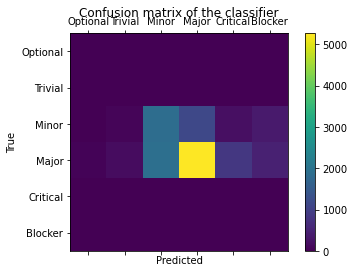

In [ ]:
# Taken from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785

#cm = confusion_matrix(y_test, pred, labels)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Using another data set

In [10]:
dataset1 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Octopus2/JIRA_OPEN_DATA_ZOOKEEPER.csv")

In [11]:
dataset1.head()

id                  created  ... assignee_id reporter_id
0  16037  2011-06-16 22:07:44.375  ...      7832.0        7832
1  16615  2009-08-07 08:57:50.287  ...      7750.0        7829
2  16189  2010-11-20 06:12:26.124  ...      8219.0        8219
3  16616   2009-08-07 06:11:42.25  ...      7750.0        7750
4  16934  2008-10-07 04:50:15.001  ...      7750.0        7827

[5 rows x 18 columns]

In [12]:
df1 = dataset1[["title", "description", "priority"]]
df1['features'] = df1['title'] + " " + df1['description']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df1.head()

title  ...                                           features
0  Quota is not correctly rehydrated on snapshot ...  ...  Quota is not correctly rehydrated on snapshot ...
1  bookkeeper create calls completion too many times  ...  bookkeeper create calls completion too many ti...
2           test -e not available on solaris /bin/sh  ...  test -e not available on solaris /bin/sh test ...
3                    CnxManagerTest failed on hudson  ...  CnxManagerTest failed on hudson It timed out a...
4                                          FLE test.  ...      FLE test. fast leader election test failing .

[5 rows x 4 columns]

In [14]:
result1 = []
for feature in df1.features:
   p = get_prediction(feature, model_name)
   result1.append(p.payload[0].display_name)

In [18]:
# create confustion matrix
cm1 = np.zeros((6,6), dtype=int)

i = 0
for l in df1.priority:
    actual = l
    predicted = result1[i]
    #print(actual + "," + predicted)
    act_idx = label_map[actual]
    pre_idx = label_map[predicted]
    #print(act_idx, pre_idx)
    cm1[pre_idx, act_idx] += 1
    i = i + 1
    
print(cm1)

[[  0   0   0   0   0   0]
 [  0   1   1   0   0   0]
 [  0   1   6  10   2   1]
 [  0  11  63 214  61  76]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [19]:
print("label precision recall")
for label in range(6):
    print(f"{label:5d} {precision(label, cm1):9.3f} {recall(label, cm1):6.3f}")

print("\n")
print("precision total:", precision_macro_average(cm1))
print("recall total:", recall_macro_average(cm1))
print("accuracy:", accuracy(cm1))

label precision recall
    0       nan    nan
    1     0.077  0.500
    2     0.086  0.300
    3     0.955  0.504
    4     0.000    nan
    5     0.000    nan


precision total: nan
recall total: nan
accuracy: 0.49440715883668906


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


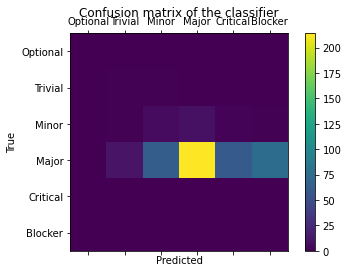

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create Production Endpoint using App Engine

## Create App Engine App


Under the "appengine" folder you will see the following 4 files:


1.   app.yaml
2.   main.py
3.   requirements.txt
4.   test.sh





In [ ]:
# this is the main.py. DO NOT RUN THIS CODE HERE

# [START gae_python38_app]
from flask import Flask, request
import sys
import os
from google.api_core.client_options import ClientOptions
from google.cloud import automl_v1
from google.cloud.automl_v1.proto import service_pb2

# If `entrypoint` is not defined in app.yaml, App Engine will look for an app
# called `app` in `main.py`.

app = Flask(__name__)
model_name = "projects/157961863513/locations/us-central1/models/TCN7663932496156819456"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "./octopus-282815-fd31678fbf06.json"

def inline_text_payload(content):
  return {'text_snippet': {'content': content, 'mime_type': 'text/plain'} }
def pdf_payload(file_path):
  return {'document': {'input_config': {'gcs_source': {'input_uris': [file_path] } } } }
def get_prediction(content, model_name):
  options = ClientOptions(api_endpoint='automl.googleapis.com')
  prediction_client = automl_v1.PredictionServiceClient(client_options=options)
  payload = inline_text_payload(content)
  # Uncomment the following line (and comment the above line) if want to predict on PDFs.
  # payload = pdf_payload(file_path)
  params = {}
  request = prediction_client.predict(model_name, payload, params)
  return request  # waits until request is returned

@app.route('/')
def hello():
    """Return a friendly HTTP greeting."""
    return 'Hello World!'

@app.route("/predict", methods=["GET","POST"])
def predict():
    if request.method == "GET":
        return "Please send Post Request"
    elif request.method == "POST":
        data = request.get_json()
        app.logger.info("%s was obtained", str(data))
        title = data['title']
        description = data['description']
        app.logger.info("description = %s", str(description))
        app.logger.info("title = %s", str(title))
        sentence = str(title) + " " + str(description)
        app.logger.info("sentence = %s", sentence)
        pred = get_prediction(sentence, model_name)
        prediction = pred.payload[0].display_name
        score = pred.payload[0].classification.score
        app.logger.info("prediction = %s score = %.3f", prediction, score)
        return { 'statusCode': 200, 'prediction': prediction, 'score': score }
        
if __name__ == '__main__':
    # This is used when running locally only. When deploying to Google App
    # Engine, a webserver process such as Gunicorn will serve the app. This
    # can be configured by adding an `entrypoint` to app.yaml.
    app.run(host='127.0.0.1', port=8080, debug=True)
# [END gae_python38_app]

A few things to note: 

*   model_name will be different for you
*   the service account creds will be different as well

You can test this locally (or on google cloud shell) by running:

*   `python3 main.py`
*   `sh test.sh`

you should get something like:
```
{
  "prediction": "Major",
  "score": 0.7177224159240723,
  "statusCode": 200
}
```





## Deploy App

Next you will need to create the app (I did this on google cloud shell):
```
gcloud app create
```

Next deploy the app:
```
gcloud app deploy app.yaml \
    --project <project id>
```

# Test API

In [27]:
! curl -X POST -H "Content-Type: application/json" -d '{"title": "TestSizeBasedThrottler fails occasionally", "description": "Every now and then TestSizeBasedThrottler fails reaching the test internal timeouts.I think the timeouts (200ms) are too short for the Jenkins machines.On my (reasonably fast) machine I get timeout reliably when I set the timeout to 50ms, and occasionally at 100ms."}' "https://octopus-282815.uc.r.appspot.com/predict"

{"prediction":"Major","score":0.7177224159240723,"statusCode":200}
